In [1]:
package = "../../"
import sys
import os
package = os.path.abspath(package)
sys.path.append(package)


In [2]:
import numpy as np
import torch
import logging
import sys
import os
import pytest
import glob
from src.trainer.qwen_image_edit_plus_trainer import QwenImageEditPlusTrainer

from src.data.config import load_config_from_yaml
from src.data.dataset import loader
from diffusers.utils import load_image

/home/lilong/.local/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(name)s: %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)],
    force=True,  # 关键：覆盖已有配置
)
logger = logging.getLogger(__name__)
logger.info("it works")


2025-10-01 14:10:10,135 | INFO | __main__: it works


# Qwen Image

In [4]:
IMAGE_PATH='https://n.sinaimg.cn/ent/transform/775/w630h945/20201127/cee0-kentcvx8062290.jpg'
IMAGE_PATH='/mnt/nas/public2/lilong/repos/qwen-image-finetune/.cache/test_input.png'
prompt='change the hair color to dark blue'
prompt_image = load_image(IMAGE_PATH)

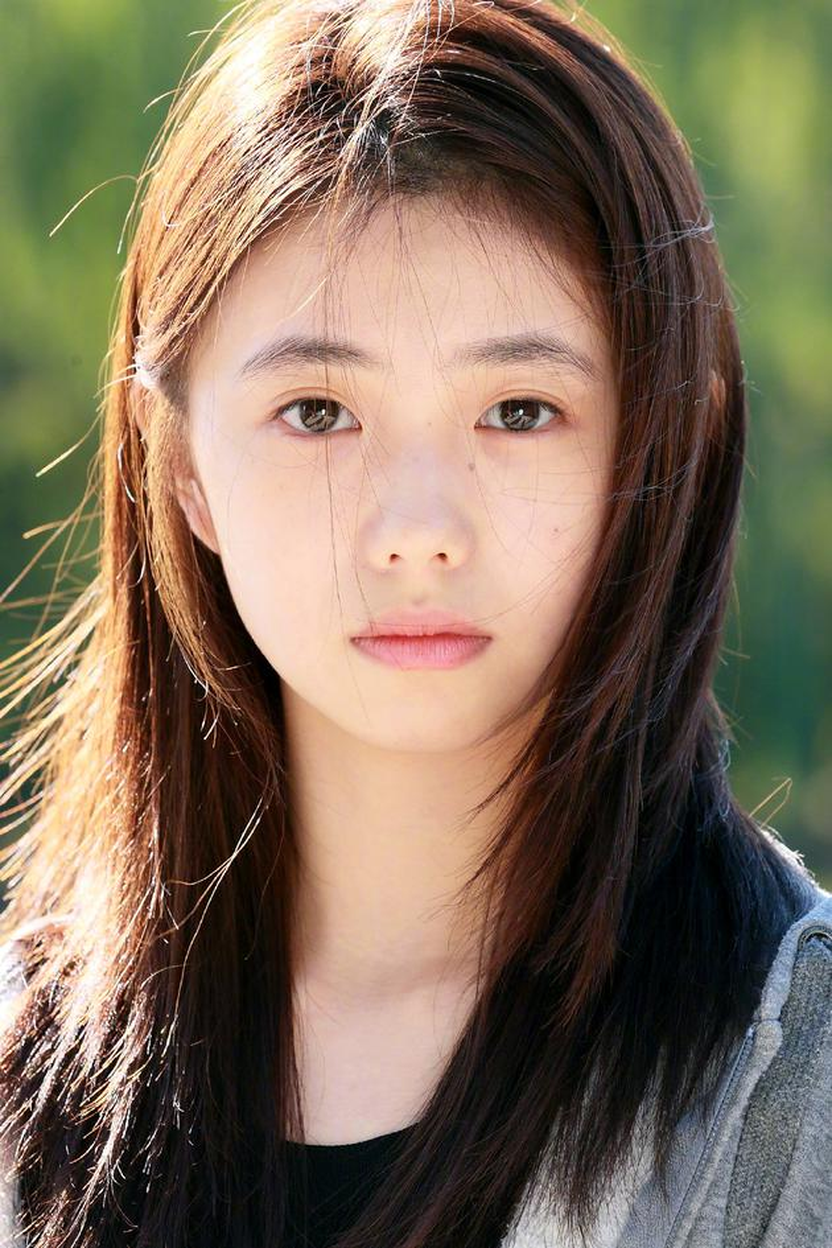

In [5]:
prompt_image

In [10]:
config="../../tests/test_configs/test_example_qwen_image_edit_plus_fp4.yaml"
config = load_config_from_yaml(config)
trainer = QwenImageEditPlusTrainer(config)

2025-09-26 10:18:38,952 | INFO | src.trainer.base_trainer: Batch Size: 4
2025-09-26 10:18:38,952 | INFO | src.trainer.base_trainer: Use Cache: True


2025-09-26 10:18:38,954 | INFO | root: ImageProcessor initialized with target_size: (832, 576)controls_size: [(832, 576)]


In [ ]:
out = trainer.predict(
    image=prompt_image,
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    controls_size=[[1248, 832]],
    best_resolution_size=True,
    height=1248,
    width=832,
    output_type='pil'
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

2025-09-25 19:59:04,455 | INFO | root: Loading model...
2025-09-25 19:59:04,456 | INFO | root: Loading QwenImageEditPipeline and separating components...


Loading pipeline components...: 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]


2025-09-25 19:59:12,310 | INFO | root: excution device: cpu
2025-09-25 19:59:13,137 | INFO | root: loaded vae from Qwen/Qwen-Image-Edit-2509 with weight_dtype torch.bfloat16


Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 22.53it/s]


2025-09-25 19:59:14,472 | INFO | root: loaded qwen_vl from Qwen/Qwen-Image-Edit-2509 with weight_dtype torch.bfloat16
2025-09-25 19:59:14,473 | INFO | root: text_encoder device: cpu
2025-09-25 19:59:14,473 | INFO | root: load model ovedrive/Qwen-Image-Edit-2509-4bit


Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]


2025-09-25 19:59:16,930 | INFO | root: loaded transformer from ovedrive/Qwen-Image-Edit-2509-4bit with weight_dtype torch.bfloat16
2025-09-25 19:59:16,947 | INFO | root: Components loaded successfully. VAE scale factor: 8
2025-09-25 19:59:28,959 | INFO | root: setup_model_device_train_mode done


                                    Model Summary: model                                    
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Section     ┃ Metric                              ┃ Value                                ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Parameters  │ Total                               │ 10.57B                               │
│ Parameters  │ Trainable                           │ 0                                    │
│ Parameters  │ Trainable %                         │ 0.00%                                │
│ Parameters  │ Memory (total)                      │ 10.50 GB                             │
│ Parameters  │ Memory (trainable)                  │ 0 B                                  │
│ Modules     │ Total                               │ 2296                                 │
│ Modules     │ Leaf                                │ 1632                                 │
│ Modules     │ Parameterized                       │ 1087                                 │
│ Transformer │ Attention blocks (total/self/cross) │ 60/60/0                              │
│ Transformer │ Heads (hist)                        │ 24×60                                │
│ Transformer │ Attn hidden dim (hist)              │ 3072×60                              │
│ Transformer │ Norms                               │ RMSNorm×241, LayerNorm×241           │
│ Transformer │ FeedForward blocks                  │ 304                                  │
│ LoRA        │ Blocks                              │ 0                                    │
│ LoRA        │ Parameters                          │ 0                                    │
│ LoRA        │ Params % of total                   │ 0.00%                                │
│ LoRA        │ Ranks (hist)                        │                                      │
│ LoRA        │ Rank min/max                        │                                      │
│ DTypes      │ dtype                               │ params(total/train) | % | mem(total) │
│ DTypes      │ nf4                                 │ 9.86B/0 | 93.34% | 9.19 GB           │
│ DTypes      │ bf16                                │ 704.13M/0 | 6.66% | 1.31 GB          │
└─────────────┴─────────────────────────────────────┴──────────────────────────────────────┘

2025-09-25 19:59:29,068 | INFO | root: setup_predict done
2025-09-25 19:59:29,071 | INFO | root: controls_size after best resolution  [(1248, 832)]
2025-09-25 19:59:29,072 | INFO | root: controls_size for processing [(1248, 832)]
control shape torch.Size([1, 3, 1248, 832])
width height 832 1248
2025-09-25 19:59:29,133 | INFO | root: target shape for generation 832, 1248
data keys dict_keys(['control', 'prompt', 'height', 'width', 'n_controls', 'negative_prompt', 'num_inference_steps', 'true_cfg_scale', 'guidance'])
control <class 'torch.Tensor'>
prompt <class 'list'>
height <class 'int'>
width <class 'int'>
n_controls <class 'int'>
negative_prompt <class 'list'>
num_inference_steps <class 'int'>
true_cfg_scale <class 'float'>
guidance <class 'NoneType'>
new_width, new_height 320 480
image shape after interpolate torch.Size([1, 3, 480, 320])
prompt_control shape torch.Size([1, 3, 480, 320])
2025-09-25 19:59:29,338 | INFO | root: batch["prompt"] ['change the hair color to dark blue']
ima

Generating: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


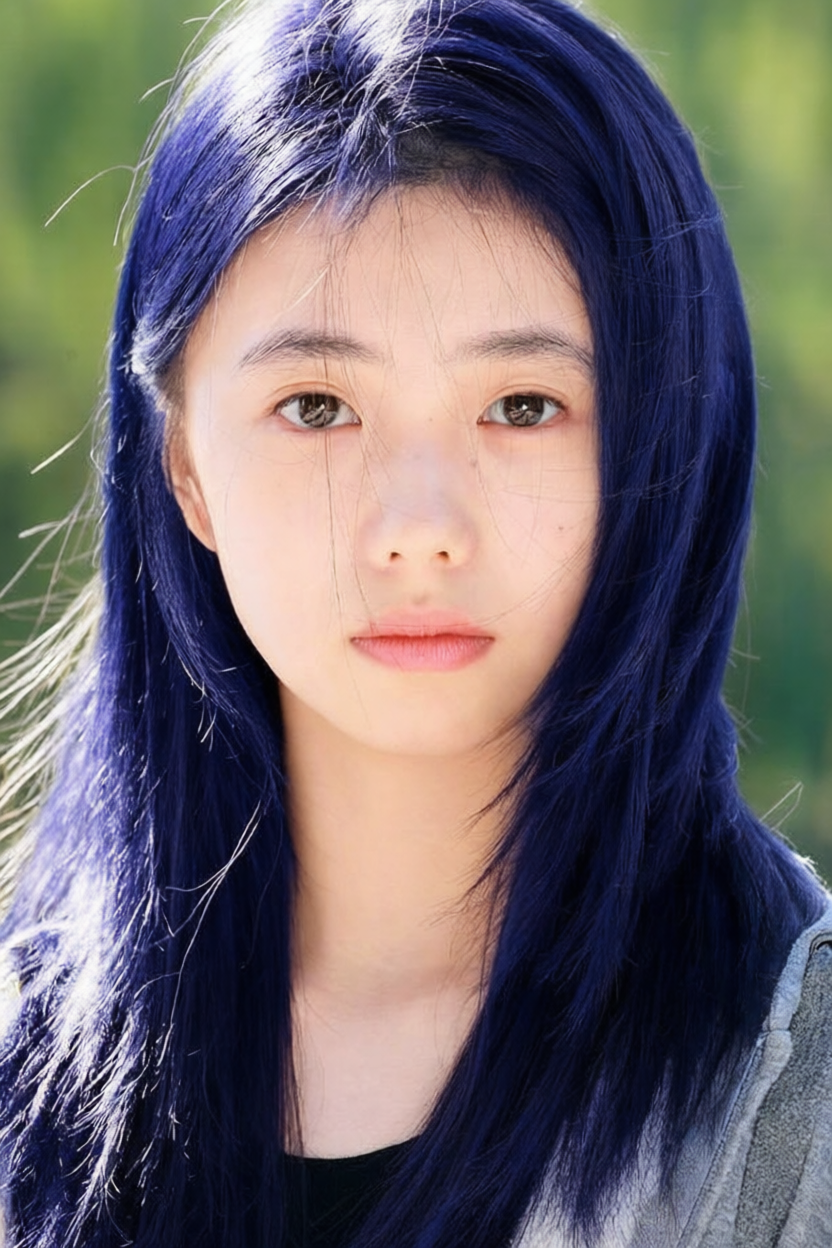

In [ ]:
out[0]

# with lora

In [9]:
# LORA_WEIGHT='TsienDragon/qwen-image-edit-lora-face-segmentation'
# LORA_WEIGHT='/tmp/image_edit_lora/faceSegQwenImageEditPlusFp4/v0/checkpoint-139-700/pytorch_lora_weights.safetensors'
LORA_WEIGHT='/tmp/image_edit_lora/faceSegQwenImageEditPlusFp4/v0/checkpoint-last-2499-12500-last/model.safetensors'
config="../../tests/test_configs/test_example_qwen_image_edit_plus_fp4.yaml"
config='../../tests/test_configs/test_example_qwen_image_edit_plus_fp4_dynamic_shapes.yaml'
config = load_config_from_yaml(config)
config.model.lora.pretrained_weight = LORA_WEIGHT
trainer = QwenImageEditPlusTrainer(config)

2025-10-01 14:11:24,496 | INFO | src.trainer.base_trainer: Batch Size: 4
2025-10-01 14:11:24,497 | INFO | src.trainer.base_trainer: Use Cache: True
2025-10-01 14:11:24,501 | INFO | root: target_pixels after best_hw_given_area 258048
2025-10-01 14:11:24,504 | INFO | root: controls_pixels after best_hw_given_area [258048]
2025-10-01 14:11:24,505 | INFO | root: ImageProcessor initialized with target_size: Nonecontrols_size: Nonetarget_pixels: 258048controls_pixels: [258048]


In [10]:
IMAGE_PATH='https://n.sinaimg.cn/ent/transform/775/w630h945/20201127/cee0-kentcvx8062290.jpg'
prompt='change the image from the face to the face segmentation mask'
prompt_image = load_image(IMAGE_PATH)


In [11]:

out = trainer.predict(
    image=prompt_image,
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    height=945,
    width=630,
    output_type='pil'
)

2025-10-01 14:11:38,618 | INFO | root: Loading model...
2025-10-01 14:11:38,619 | INFO | root: Loading QwenImageEditPipeline and separating components...


Loading pipeline components...: 100%|██████████| 4/4 [00:09<00:00,  2.27s/it]


2025-10-01 14:11:51,146 | INFO | root: excution device: cpu
2025-10-01 14:11:52,508 | INFO | root: loaded vae from Qwen/Qwen-Image-Edit-2509 with weight_dtype torch.bfloat16


Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 20.81it/s]


2025-10-01 14:11:55,603 | INFO | root: loaded qwen_vl from Qwen/Qwen-Image-Edit-2509 with weight_dtype torch.bfloat16
2025-10-01 14:11:55,603 | INFO | root: text_encoder device: cpu
2025-10-01 14:11:55,604 | INFO | root: load model ovedrive/Qwen-Image-Edit-2509-4bit


Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


2025-10-01 14:12:00,389 | INFO | root: loaded transformer from ovedrive/Qwen-Image-Edit-2509-4bit with weight_dtype torch.bfloat16
2025-10-01 14:12:00,410 | INFO | root: Components loaded successfully. VAE scale factor: 8
2025-10-01 14:12:00,472 | INFO | root: load lora from pretrained weight
2025-10-01 14:12:00,631 | INFO | root: sha256 for pretrained_weight: 4a7af16e3033e70b113e57c8031d14057ff99436a84c9f0cf86a0a7d818d6d13
2025-10-01 14:12:00,650 | INFO | root: add_lora_adapter: LoraConfig(task_type=None, peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path=None, revision=None, inference_mode=False, r=16, target_modules={'to_v', 'to_q', 'to_out.0', 'to_k'}, exclude_modules=None, lora_alpha=16, lora_dropout=0.0, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights='gaussian', layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', trainable_tok

                                    Model Summary: model                                    
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Section     ┃ Metric                              ┃ Value                                ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Parameters  │ Total                               │ 10.59B                               │
│ Parameters  │ Trainable                           │ 0                                    │
│ Parameters  │ Trainable %                         │ 0.00%                                │
│ Parameters  │ Memory (total)                      │ 10.58 GB                             │
│ Parameters  │ Memory (trainable)                  │ 0 B                                  │
│ Modules     │ Total                               │ 4696                                 │
│ Modules     │ Leaf                                │ 3072                                 │
│ Modules     │ Parameterized                       │ 1567                                 │
│ Transformer │ Attention blocks (total/self/cross) │ 60/60/0                              │
│ Transformer │ Heads (hist)                        │ 24×60                                │
│ Transformer │ Attn hidden dim (hist)              │ 3072×60                              │
│ Transformer │ Norms                               │ RMSNorm×241, LayerNorm×241           │
│ Transformer │ FeedForward blocks                  │ 604                                  │
│ LoRA        │ Blocks                              │ 480                                  │
│ LoRA        │ Parameters                          │ 23.59M                               │
│ LoRA        │ Params % of total                   │ 0.22%                                │
│ LoRA        │ Ranks (hist)                        │ r=16×480                             │
│ LoRA        │ Rank min/max                        │ 16 / 16                              │
│ DTypes      │ dtype                               │ params(total/train) | % | mem(total) │
│ DTypes      │ nf4                                 │ 9.86B/0 | 93.13% | 9.19 GB           │
│ DTypes      │ bf16                                │ 704.92M/0 | 6.66% | 1.31 GB          │
│ DTypes      │ fp32                                │ 22.81M/0 | 0.22% | 87.00 MB          │
└─────────────┴─────────────────────────────────────┴──────────────────────────────────────┘

2025-10-01 14:12:19,656 | INFO | root: setup_predict done
2025-10-01 14:12:19,669 | INFO | root: controls_size for processing None
original w,h 624 944
new shape 384 672 target_pixels 258048
2025-10-01 14:12:19,683 | INFO | root: target shape for generation 624, 944
new_width, new_height 288 512
image shape after interpolate torch.Size([1, 3, 512, 288])
do true cfg False has neg prompt True true_cfg_scale 1.0
2025-10-01 14:12:21,014 | INFO | root: mask shape: torch.Size([1, 203]), dtype: torch.int64
2025-10-01 14:12:21,014 | INFO | root: prompt_embeds shape: torch.Size([1, 203, 3584]), dtype: torch.bfloat16
shape of latents torch.Size([1, 2301, 64]) torch.Size([1, 1008, 64])
2025-10-01 14:12:21,015 | INFO | root: image latent got grad: False
2025-10-01 14:12:21,015 | INFO | root: latents shape: torch.Size([1, 2301, 64])
2025-10-01 14:12:21,016 | INFO | root: num_channels_latents: 16
2025-10-01 14:12:21,016 | INFO | root: image-latent shape: torch.Size([1, 1008, 64])
2025-10-01 14:12:21

Generating: 100%|██████████| 20/20 [00:13<00:00,  1.49it/s]


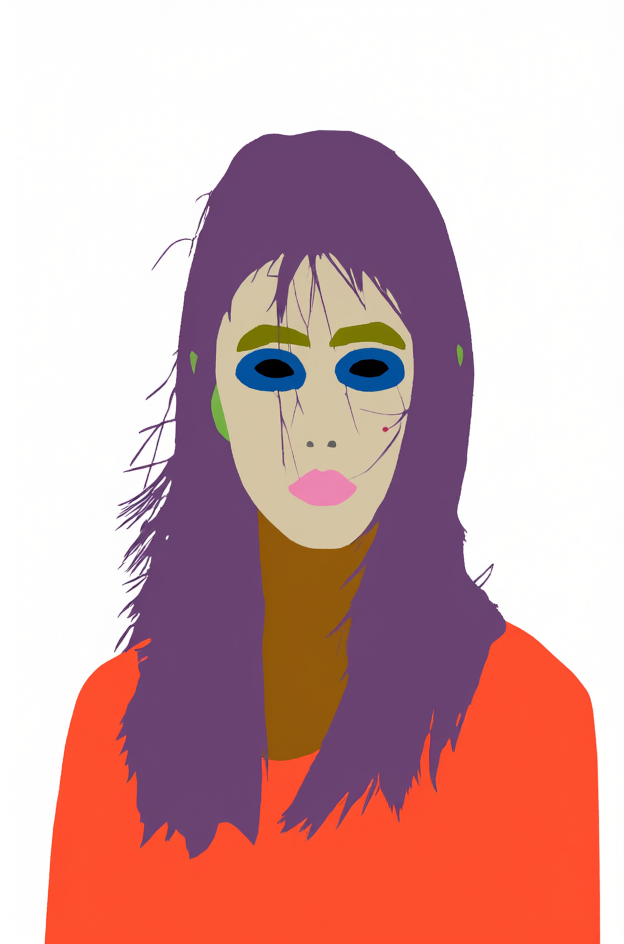

In [12]:
out[0]

# character compositino

## without lora

In [9]:
config="../../tests/test_configs/test_example_qwen_image_edit_plus_fp4_character_composition.yaml"
config = load_config_from_yaml(config)
trainer = QwenImageEditPlusTrainer(config)

2025-09-26 10:11:45,234 | INFO | src.trainer.base_trainer: Batch Size: 4
2025-09-26 10:11:45,235 | INFO | src.trainer.base_trainer: Use Cache: True
2025-09-26 10:11:45,236 | INFO | root: ImageProcessor initialized with target_size: (384, 672)controls_size: [(384, 672), (512, 512)]


In [17]:
import requests
from PIL import Image
from io import BytesIO

image_file="https://cdna.artstation.com/p/assets/images/images/027/134/318/large/pang-ying-ep03-scene-sc037.jpg?1590684056"
image_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/scene_girl.png'
image_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_honey_small.webp'
iamge_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_dog.webp'
control_1 = load_image(image_file).convert('RGB')

import requests
from io import BytesIO
from PIL import Image
# control_1 = load_image('https://cdn.shopify.com/s/files/1/0705/5491/0959/files/100_dfdf593d-bc73-4bb5-8d23-9181d510f628_480x480.webp')
# control_1 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/scene_girl_control_1.webp')
# control_1 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_honey_small_control_1.png')
control_2 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_dog_control_1.webp')
prompt='Add the character to the image'
prompt

'Add the character to the image'

In [18]:
out = trainer.predict(
    image=[control_1, control_2],
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=4.5,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    height=384,
    width=672,
    controls_size=[[384,672],[512,512]],
    additional_controls=[[control_1]],
    output_type='pil'
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

2025-09-26 10:14:40,603 | INFO | root: controls_size for processing [[384, 672], [512, 512]]
2025-09-26 10:14:40,625 | INFO | root: target shape for generation 672, 384
new_width, new_height 512 288
image shape after interpolate torch.Size([1, 3, 288, 512])
new_width, new_height 384 384
image shape after interpolate torch.Size([1, 3, 384, 384])
do true cfg True has neg prompt True true_cfg_scale 4.5
2025-09-26 10:14:41,972 | INFO | root: negative_prompt: ['']
2025-09-26 10:14:41,972 | INFO | root: mask shape: torch.Size([1, 401]), dtype: torch.int64
2025-09-26 10:14:41,973 | INFO | root: prompt_embeds shape: torch.Size([1, 401, 3584]), dtype: torch.bfloat16
shape of latents torch.Size([1, 1008, 64]) torch.Size([1, 2032, 64])
2025-09-26 10:14:41,974 | INFO | root: image latent got grad: False
2025-09-26 10:14:41,974 | INFO | root: latents shape: torch.Size([1, 1008, 64])
2025-09-26 10:14:41,975 | INFO | root: num_channels_latents: 16
2025-09-26 10:14:41,975 | INFO | root: image-latent s

Generating: 100%|██████████| 20/20 [00:44<00:00,  2.20s/it]


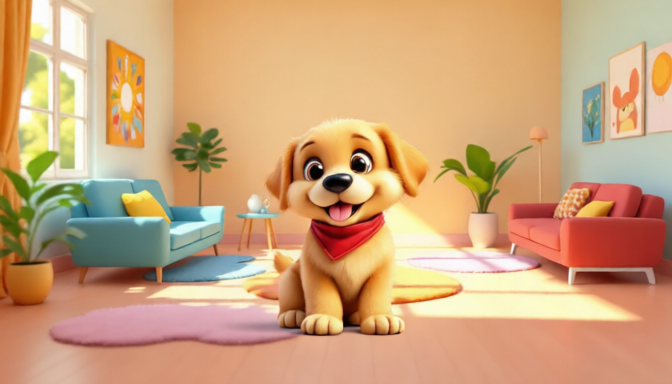

In [19]:
out[0]

## with lora

In [4]:
LORA_WEIGHT='/tmp/image_edit_lora/characterCompositionQwenImageEditPlusFp4/v0/checkpoint-last-767-6143-last/pytorch_lora_weights.safetensors'
config="../../tests/test_configs/test_example_qwen_image_edit_plus_fp4_character_composition.yaml"
config = load_config_from_yaml(config)
config.model.lora.pretrained_weight = LORA_WEIGHT
trainer = QwenImageEditPlusTrainer(config)

2025-09-26 10:04:16,098 | INFO | src.trainer.base_trainer: Batch Size: 4
2025-09-26 10:04:16,099 | INFO | src.trainer.base_trainer: Use Cache: True
2025-09-26 10:04:16,101 | INFO | root: ImageProcessor initialized with target_size: (384, 672)controls_size: [(384, 672), (512, 512)]


In [5]:
import requests
from PIL import Image
from io import BytesIO

image_file="https://cdna.artstation.com/p/assets/images/images/027/134/318/large/pang-ying-ep03-scene-sc037.jpg?1590684056"
image_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/scene_girl.png'
image_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_honey_small.webp'
iamge_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_dog.webp'
control_1 = load_image(image_file).convert('RGB')

import requests
from io import BytesIO
from PIL import Image
# control_1 = load_image('https://cdn.shopify.com/s/files/1/0705/5491/0959/files/100_dfdf593d-bc73-4bb5-8d23-9181d510f628_480x480.webp')
# control_1 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/scene_girl_control_1.webp')
# control_1 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_honey_small_control_1.png')
control_2 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_dog_control_1.webp')
prompt='Add the character to the image'
prompt

'Add the character to the image'

In [7]:
out = trainer.predict(
    image=[control_1, control_2],
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    height=384,
    width=672,
    controls_size=[[384,672],[512,512]],
    additional_controls=[[control_1]],
    output_type='pil'
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

2025-09-26 10:04:34,500 | INFO | root: Loading model...
2025-09-26 10:04:34,501 | INFO | root: Loading QwenImageEditPipeline and separating components...


Loading pipeline components...: 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]


2025-09-26 10:04:44,497 | INFO | root: excution device: cpu
2025-09-26 10:04:45,045 | INFO | root: loaded vae from Qwen/Qwen-Image-Edit-2509 with weight_dtype torch.bfloat16


Loading checkpoint shards: 100%|██████████| 5/5 [00:00<00:00, 24.85it/s]


2025-09-26 10:04:46,569 | INFO | root: loaded qwen_vl from Qwen/Qwen-Image-Edit-2509 with weight_dtype torch.bfloat16
2025-09-26 10:04:46,570 | INFO | root: text_encoder device: cpu
2025-09-26 10:04:46,571 | INFO | root: load model ovedrive/Qwen-Image-Edit-2509-4bit


Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]


2025-09-26 10:04:49,127 | INFO | root: loaded transformer from ovedrive/Qwen-Image-Edit-2509-4bit with weight_dtype torch.bfloat16
2025-09-26 10:04:49,146 | INFO | root: Components loaded successfully. VAE scale factor: 8
2025-09-26 10:04:49,191 | INFO | root: load lora from pretrained weight
2025-09-26 10:04:49,389 | INFO | root: sha256 for pretrained_weight: 27057b8491602aaf27fb01382a928aa497a635960fda09afb7f27b47bf011520
2025-09-26 10:04:51,137 | INFO | root: set_lora: DIFFUSERS Loaded lora from /tmp/image_edit_lora/characterCompositionQwenImageEditPlusFp4/v0/checkpoint-last-767-6143-last/pytorch_lora_weights.safetensors for lora_edit
2025-09-26 10:04:51,138 | INFO | root: set_lora: Loaded lora from /tmp/image_edit_lora/characterCompositionQwenImageEditPlusFp4/v0/checkpoint-last-767-6143-last/pytorch_lora_weights.safetensors
2025-09-26 10:05:20,703 | INFO | root: setup_model_device_train_mode done


                                    Model Summary: model                                    
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Section     ┃ Metric                              ┃ Value                                ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Parameters  │ Total                               │ 10.59B                               │
│ Parameters  │ Trainable                           │ 0                                    │
│ Parameters  │ Trainable %                         │ 0.00%                                │
│ Parameters  │ Memory (total)                      │ 10.58 GB                             │
│ Parameters  │ Memory (trainable)                  │ 0 B                                  │
│ Modules     │ Total                               │ 4696                                 │
│ Modules     │ Leaf                                │ 3072                                 │
│ Modules     │ Parameterized                       │ 1567                                 │
│ Transformer │ Attention blocks (total/self/cross) │ 60/60/0                              │
│ Transformer │ Heads (hist)                        │ 24×60                                │
│ Transformer │ Attn hidden dim (hist)              │ 3072×60                              │
│ Transformer │ Norms                               │ RMSNorm×241, LayerNorm×241           │
│ Transformer │ FeedForward blocks                  │ 604                                  │
│ LoRA        │ Blocks                              │ 480                                  │
│ LoRA        │ Parameters                          │ 23.59M                               │
│ LoRA        │ Params % of total                   │ 0.22%                                │
│ LoRA        │ Ranks (hist)                        │ r=16×480                             │
│ LoRA        │ Rank min/max                        │ 16 / 16                              │
│ DTypes      │ dtype                               │ params(total/train) | % | mem(total) │
│ DTypes      │ nf4                                 │ 9.86B/0 | 93.13% | 9.19 GB           │
│ DTypes      │ bf16                                │ 704.92M/0 | 6.66% | 1.31 GB          │
│ DTypes      │ fp32                                │ 22.81M/0 | 0.22% | 87.00 MB          │
└─────────────┴─────────────────────────────────────┴──────────────────────────────────────┘

2025-09-26 10:05:20,869 | INFO | root: setup_predict done
2025-09-26 10:05:20,873 | INFO | root: controls_size for processing [[384, 672], [512, 512]]
2025-09-26 10:05:20,887 | INFO | root: target shape for generation 672, 384
new_width, new_height 512 288
image shape after interpolate torch.Size([1, 3, 288, 512])
new_width, new_height 384 384
image shape after interpolate torch.Size([1, 3, 384, 384])
do true cfg False has neg prompt True true_cfg_scale 1.0
2025-09-26 10:05:22,625 | INFO | root: mask shape: torch.Size([1, 401]), dtype: torch.int64
2025-09-26 10:05:22,626 | INFO | root: prompt_embeds shape: torch.Size([1, 401, 3584]), dtype: torch.bfloat16
shape of latents torch.Size([1, 1008, 64]) torch.Size([1, 2032, 64])
2025-09-26 10:05:22,627 | INFO | root: image latent got grad: False
2025-09-26 10:05:22,627 | INFO | root: latents shape: torch.Size([1, 1008, 64])
2025-09-26 10:05:22,628 | INFO | root: num_channels_latents: 16
2025-09-26 10:05:22,628 | INFO | root: image-latent sha

Generating: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


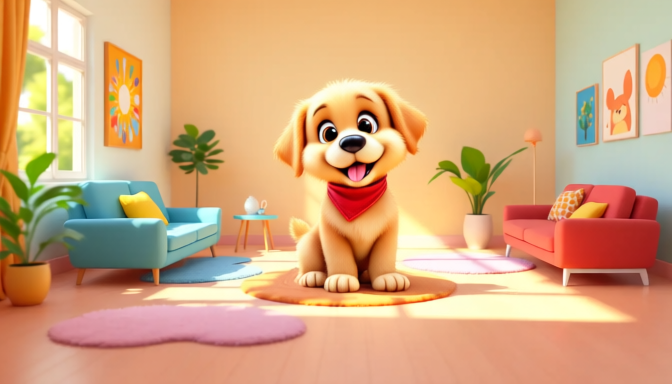

In [8]:
out[0]